# Fitting Functions

Here we are going to learn how to fit functions in Python. Lets start with a simple example where we create some random data in the shape of a sine curve with some amplitude and phase.

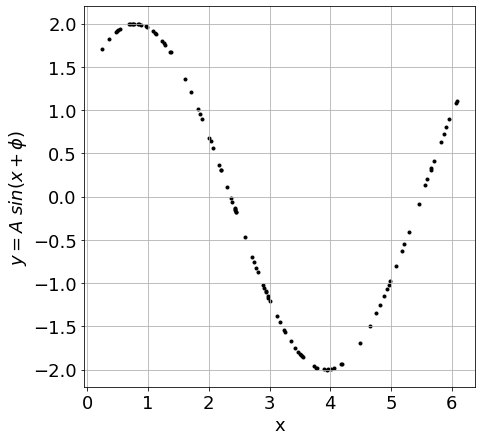

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def sine(x,amp,phase):
    """
    x: input in radians
    amp: amplitude of sine curve
    phase: phase of the sine curve in radians
    """
    return amp*np.sin(x+phase)

#generate 100 random points between 0 and 2 pi
N_samp=100
x=np.random.random(N_samp)*2*np.pi

#set amplitude and phase
amp=2.
phase=np.pi/4

y=sine(x,amp,phase)

#plot the data
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,7))
plt.scatter(x,y,c='k',marker='.')
plt.grid()
plt.xlabel('x')
plt.ylabel(r'$y=A\ sin(x+\phi)$')
plt.show()

Now, if we want to try to fit the above data by recovering the fitting parameters (i.e. the amplitude and phase), an easy way to do this is to use the scipy.optimize package. Specifically, curve_fit is able use non-linear least squares to fit a function. We will use it below to fit the above data:

Fitted Amplitude=2.0000, Difference from True Value=0.0000
Fitted Phase=0.7854, Difference from True Value=0.0000


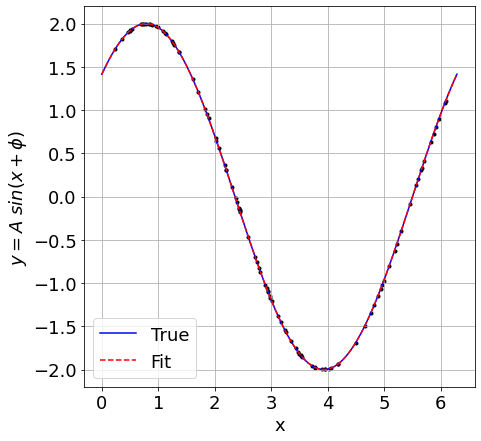

In [2]:
from scipy.optimize import curve_fit

#this function fits a fucntion using non-linear least squares regression
#it takes f,x,y; where f is the fucntion, x is the xdata and y is the y data
params,cov=curve_fit(sine,x,y)

print('Fitted Amplitude=%.4f, Difference from True Value=%.4f' % (params[0],abs(amp-params[0])))
print('Fitted Phase=%.4f, Difference from True Value=%.4f' % (params[1],abs(phase-params[1])))

#plot the fit
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,7))
plt.scatter(x,y,c='k',marker='.',label='_nolabel_')

xcont=np.linspace(0,2*np.pi,1000)
plt.plot(xcont,sine(xcont,amp,phase),c='b',label='True')
plt.plot(xcont,sine(xcont,*params),'--',c='r',label='Fit')

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel(r'$y=A\ sin(x+\phi)$')
plt.show()

As we can see, this is easily able to recover the paramaters. This is of course an idealized situation. What is we add noise to the data?

Fitted Amplitude=1.9141, Difference from True Value=0.0859
Fitted Phase=0.8375, Difference from True Value=0.0521


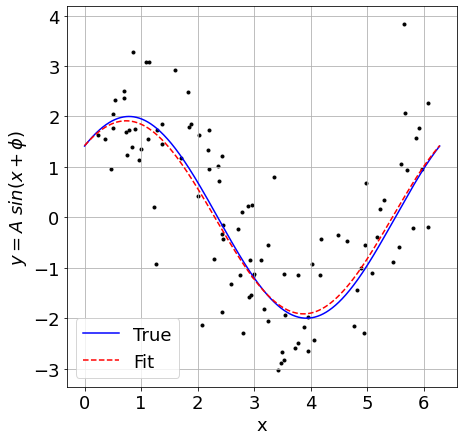

In [3]:
#create normally distributed noise with some standard deviation
std=1
y_noise=np.random.randn(N_samp)*std


params,cov=curve_fit(sine,x,y+y_noise)

print('Fitted Amplitude=%.4f, Difference from True Value=%.4f' % (params[0],abs(amp-params[0])))
print('Fitted Phase=%.4f, Difference from True Value=%.4f' % (params[1],abs(phase-params[1])))

#plot the fit
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,7))
plt.scatter(x,y+y_noise,c='k',marker='.',label='_nolabel_')

xcont=np.linspace(0,2*np.pi,1000)
plt.plot(xcont,sine(xcont,amp,phase),c='b',label='True')
plt.plot(xcont,sine(xcont,*params),'--',c='r',label='Fit')

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel(r'$y=A\ sin(x+\phi)$')
plt.show()

We can also account for this noise in our fit:

Fitted Amplitude=1.9843, Difference from True Value=0.0157
Fitted Phase=0.7884, Difference from True Value=0.0030


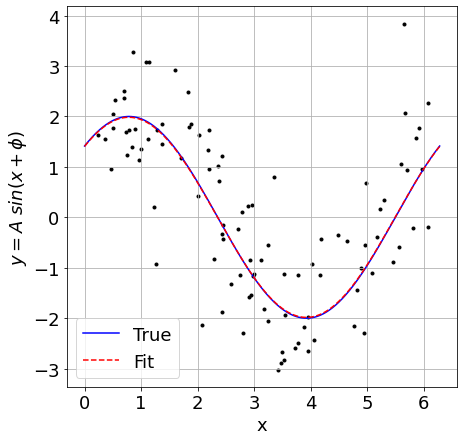

In [4]:
params,cov=curve_fit(sine,x,y+y_noise,sigma=y_noise)

print('Fitted Amplitude=%.4f, Difference from True Value=%.4f' % (params[0],abs(amp-params[0])))
print('Fitted Phase=%.4f, Difference from True Value=%.4f' % (params[1],abs(phase-params[1])))

#plot the fit
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,7))
plt.scatter(x,y+y_noise,c='k',marker='.',label='_nolabel_')

xcont=np.linspace(0,2*np.pi,1000)
plt.plot(xcont,sine(xcont,amp,phase),c='b',label='True')
plt.plot(xcont,sine(xcont,*params),'--',c='r',label='Fit')

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel(r'$y=A\ sin(x+\phi)$')
plt.show()